# Overlord AI
For information about this project, see [this README.md](../doc/README.md)


## TODO:

* [x] notebook source list
* [x] notebook downloads
* [ ] dataset downloads
* [ ] dataset processing
* [ ] model training

# CODE STARTS HERE

First we import all the libraries and whatnot

# imports


In [1]:
import requests
import pandas as pd
import numpy as np
import pylab as pyl
import matplotlib.pyplot as plt
import os
import re

# definitions

I added an optional download for the used workbooks so you have them saved locally for when you want to use them. When set to True, all the models will be downloaded to ../data/.models/

In [2]:
useScrapedCsv = False
downloadWorkbooks = False
downloadDatasets = False

maxTagLength = 40
maxDataSourceLinkLength = 200

# reading data


## data gathering

In [3]:
df = pd.DataFrame([], columns=[
                  'index', 'link', 'requeststatus', 'content'])
sourcelist = pd.read_csv("../data/models/sources.csv")                  
index = 0
    
if(useScrapedCsv):
    df = pd.read_csv("kaggleScrape.csv", index_col=0)
else:
    # print(sourcelist)
    for item in sourcelist['Sources']:  # loop through sources
        print(index)
        r = requests.get(item)  # get the html data

    # add data to the df
        new_row = [index, item, r.status_code, r.text]
        df.loc[index] = new_row
        index += 1
if (downloadWorkbooks and not useScrapedCsv):
    for item in sourcelist['Sources']:
        # download the workbooks
        print(index)
        kagglelink = item.replace('https://www.kaggle.com/code/', "")
        dirname = kagglelink.split("/")[1]
        command = "kaggle k pull " + kagglelink + " -p ../data/.models/"+dirname+"/src/"
        print(command)
        #os.system('%s' % command)
        index += 1
print("data gathered")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
data gathered


### get dataset link

In [4]:

# from logging import exception

# #TODO YEET ALL THIS IN DATASET GATHERING

# def isNaN(string):
#         return string != string
# successful =0
# failed = 0
# if (downloadDatasets):
#         for index,  row in df.iterrows():
#                 print(index)
#                 kagglelink = str(df.loc[df['index'] == index, 'link'].replace('https://www.kaggle.com/code/', ""))
#                 #print("ASDF %s"%kagglelink)
#                 #print (type(datalink))
#                 dirname = kagglelink.split("/")[1]
#                 # download the dataset
#                 try:
#                         for sourceCount in range(3):
#                                 datalink = df.loc[df['index'] == index, 'dataSourceUrl%d'%sourceCount]
#                                 #print(type(datalink))
#                                 #print(datalink)
#                                 if(type(datalink[0])!=float):
#                                         #kagglelink = str(df.loc[df['index'] == index, 'dataSourceUrl%d'%sourceCount].replace('https://www.kaggle.com/code/', ""))
#                                         #print("AAAAAAAAAAAAAAAAAAa")
#                                         #print(type(datalink[0]))
#                                         print(datalink[0])
#                                         command = "kaggle datasets download -d " + str(datalink[0]) + " -p ../data/.models/"+str(dirname)+"input/"
#                                         print(command)
#                                         #os.system('%s' % command)
#                                         successful+=1
#                 except:
#                         #print(type(datalink[0]))
#                         #print(datalink[0])
#                         print(exception)
#                         failed +=1   
#         print("________________________________________")
#         print("%d dataset(s) downloaded successfully"%successful)
#         print("%d dataset(s) failed to download"%failed)
#         print("%d total dataset(s)"%(successful+failed))
# else:
#         print("skipped dataset downloading")                     

## transform data

### get dataset

In [5]:
def getDataSets(index,row):
    #print(index)
    # print(row['content'])
    iter =0
    index2=0
    dataSourceUrl = re.findall("\"dataSourceUrl\"\:.{,%d}\"thumbnailUrl\""%maxDataSourceLinkLength, row['content']) # TODO make other stuff like this (tags)
    if(dataSourceUrl):
        #print("Dataset Url: %s"%dataSourceUrl)
        for source in dataSourceUrl:
            sourceClean = re.split(':|,|"', source)[4]
            df.loc[df['index'] == index, 'dataSourceUrl%d'%index2] = str(sourceClean)
            print("Dataset Url: %s"%sourceClean)
            if(downloadDatasets and not useScrapedCsv):
                sourceSplit = sourceClean.split('/', maxsplit=2)
                if(sourceSplit[1]=='datasets'):
                    command = "kaggle datasets download -d " + sourceSplit[2] + " -p ../data/.models/"+str(dirname)+"input/"
                    print(command)
                    #os.system('%s' % command)
                if(sourceSplit[1]=='competitions'):
                    command = "kaggle datasets download -d " + sourceSplit[2] + " -p ../data/.models/"+str(dirname)+"input/"
                    print(command)
                    #os.system('%s' % command)
                if(sourceSplit[1]=='kaggle'):
                    print("no dataset")
                #print(sourceSplit)
                # command = "kaggle datasets download -d " + sourceClean + " -p ../data/.models/"+str(dirname)+"input/"
                # print(command)
                #os.system('%s' % command)
            index2 +=1

    if(downloadDatasets and not useScrapedCsv):
        print("Finished downloading datasets")
    else:
        print("Skipped downloading datasets")

### get execution time

In [6]:
# html parsing
# grep -ioe "runtimeseconds\"\:[0-9]*\.[0-9]*" # grep to extract the run time form html
def getExecTime(index,row):

    # print(index)
    # print(row['content'])
    runTime = float(re.split(":", re.findall(
        "\"runTimeSeconds\"\:[0-9]+\.[0-9]+", row['content'])[0])[1])
    print("runtime in seconds: %f"%runTime)
    df.loc[df['index'] == index, 'runTime'] = runTime


### get upvotes

In [7]:
# html parsing
# grep -ioe "runtimeseconds\"\:[0-9]*\.[0-9]*" # grep to extract the run time form html
def getUpvotes(index,row):
    # print(index)
    # print(row['content'])
    upvoteCount = int(re.split(":", re.findall(
        "\"upvoteCount\"\:[0-9]+", row['content'])[0])[1])
    print("upvotes: %d"%upvoteCount)
    df.loc[df['index'] == index, 'upvoteCount'] = upvoteCount


### get tags

In [8]:
def getTags(index, row):
# for index, row in df.iterrows():
    # print(index)
    # "tags"":[]
    tags = re.findall("\"tags\"\:\[.+\"\}\]\,\"upvoteCount\"", row['content'])
    # print(tags)
    tagsFormatted = ""
    # this is here so it's before all the hot encoded stuff
    df.loc[df['index'] == index, 'tags'] = tagsFormatted
    if (tags):
        for iter in range(maxTagLength):
            temp = re.findall("\"slug\"\:\".{%d}\"\,\"url" % iter, tags[0])

            if (temp):
                temp = re.split(':|,|"', temp[0])[4]
                # print(temp)
                # hot encoded tags
                df.loc[df['index'] == index, "%s_t"%temp] = 1
                # fill the empty values
                #df[temp] = df[temp].fillna(0)
                tagsFormatted = tagsFormatted + temp + " "

    print(tagsFormatted)  # human readable, space delimited list of the tags
    df.loc[df['index'] == index, 'tags'] = tagsFormatted


In [9]:

for index, row in df.iterrows():
    print(index)
    getExecTime(index,row)
    getUpvotes(index,row)
    getDataSets(index,row)
for index, row in df.iterrows():
    print(index)
    getTags(index,row) # must always be last and grouped so can't be run at the same time as the other gets as getDataSets can split up the tag columns

# df.to_csv('kaggleScrape.csv', index=True)

# for index, row in df.iterrows():
#     df.loc[df['index'] == index, 'content'] = ""

0
runtime in seconds: 861.112981
upvotes: 4203
Dataset Url: /datasets/mlg-ulb/creditcardfraud
Skipped downloading datasets
1
runtime in seconds: 1206.104310
upvotes: 3346
Dataset Url: /competitions/home-credit-default-risk
Skipped downloading datasets
2
runtime in seconds: 20.786203
upvotes: 2691
Dataset Url: /competitions/titanic
Skipped downloading datasets
3
runtime in seconds: 386.320938
upvotes: 2501
Dataset Url: /competitions/titanic
Skipped downloading datasets
4
runtime in seconds: 22.583234
upvotes: 2306
Dataset Url: /datasets/uciml/biomechanical-features-of-orthopedic-patients
Skipped downloading datasets
5
runtime in seconds: 48.534224
upvotes: 2261
Dataset Url: /datasets/ardamavi/sign-language-digits-dataset
Skipped downloading datasets
6
runtime in seconds: 49.849152
upvotes: 1658
Dataset Url: /datasets/uciml/breast-cancer-wisconsin-data
Skipped downloading datasets
7
runtime in seconds: 2790.507509
upvotes: 1251
Dataset Url: /datasets/authman/pickled-glove840b300d-for-10s

In [10]:
df2 = pd.DataFrame([], columns=[
                  'index', 'link', 'requeststatus', 'content'])
if(useScrapedCsv):
    df2=pd.read_csv("notebookScrape.csv",index_col=0)
else:
    for index, row in df.iterrows():
        print(index)
        # print(row['content'])
        noteBookLinkRaw=re.findall(
            "\"renderedOutputUrl\"\:\"https\:\/\/www\.kaggleusercontent\.com\/kf\/\d+\/.+\/__result[sx]__\.html\?sharingControls=true\"\,\"", row['content'])
        try:
            noteBookLink = re.split(":",noteBookLinkRaw[0] , maxsplit=1)[1]
            noteBookLink = noteBookLink.strip(' " " ')
            print("Notebook link: %s" % noteBookLink)
            # df.loc[df['index'] == index, 'noteBookLink'] = noteBookLink
            r = requests.get(noteBookLink)
            new_row = [index, noteBookLink, r.status_code, r.text]
            df2.loc[index] = new_row
        except:
            print("No notebook link found, double check if this is a notebook or something else!")
            r=0
        


0
Notebook link: https://www.kaggleusercontent.com/kf/16695845/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..tWUxB0numBUZwjU_bVCPSQ.joJoer2qKVwWoHPc1JejwvdFp6Zsris--N_lYYKOMQpFk-CI0WEl9PgtGvFc9zu-NwoIvL6d8clc_69e5laAkjaG_oez8wHPF7Pd2KvjT4ANnn1fmYF9wEoxZd4oDb-tz_FbEj3_xt_oWD74o8-Ds7eb7yjpq8EaCcPMP-OOUBONGSokQl7D32cU_9nviBMGTqFIdgeDVcMP-AqsGsDgtVbdGmo8XVG2uEwi38hz9nEwnmiK9Ln2Td6VI5NSDWH6SIU5YtUDxOZy0GuT-Wq9e5XzcSKtVbw5ND0V3LsOWsGko8sQHifYtIPSZve1xIUq_CAtnCEP4dw2cPIrlOYMXGJPYlOZtgV0E5hVCdNpi3PpBmym7BLbDDmcv0InyNEJOXsaG7E2eP8HRbsSXrSdFvOcJpc1NgeS2UVVgI7K4HQs53yZDNwQSDANPeRPsMeSGkDi3GWhL7p98vaTgUw_huhqKilsAqxqo9RR0_jSvlA9bhtqBlQePgtV-Neb3aey3jEaLFMQ8Tw1Jj6EABu2lMrHoo5xQIY-o-PKO5SOgK3gzAGx_6jRaSrcOV7XKerRTyeeYLu9La8dJM_1ZEclA0fMeRYg_nJjHrHg7d7MkMdVHzI3cEXeFJNlTofKtI36ufWoRnG398BhOgDcQj65o4LXGIL--1W75WQKADCalKfV1XfHJHdwOYWFbdYC_5Ai.LVWvvbuKVVcNXZdC144ngw/__results__.html?sharingControls=true",
1
Notebook link: https://www.kaggleusercontent.com/kf/5301226/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0J

In [11]:
#process the notebook data

def getImports(index, row):
    # print(index)
    # "tags"":[]
    imports = re.findall("\<span class\=\"kn\"\>import\<\/span\> \<span class\=\"nn\"\>[a-zA-Z0-9\-]+\<\/span\>", row['content'])
    # print(tags)
    importsFormatted = ""
    # this is here so it's before all the hot encoded stuff
    df.loc[df['index'] == index, 'imports'] = importsFormatted

    if (imports):
        print(index)
        for import_ in imports:
            importClean=re.sub(r"<span class=\"kn\">import</span> <span class=\"nn\">", "", import_)
            importClean=re.sub(r"</span>", "", importClean)
            #print(importClean)
            if not importsFormatted.__contains__(importClean):
                importsFormatted = importsFormatted + importClean + " "
                df.loc[df['index'] == index, "%s_i"%importClean] = 1
                #df[importsFormatted] = df[importsFormatted].fillna(0)
    print(importsFormatted)
    df.loc[df['index'] == index, 'imports'] = importsFormatted

# del df2 # clear the memory

In [12]:
for index, row in df2.iterrows():
    getImports(index,row)

0
numpy pandas tensorflow seaborn time collections warnings keras itertools 
1
numpy pandas os warnings seaborn lightgbm gc 
2
pandas numpy seaborn 
3
numpy pandas seaborn warnings xgboost 
4
numpy pandas seaborn warnings 
5
numpy pandas warnings 
6
numpy pandas seaborn time warnings 
7
gc re string operator numpy pandas seaborn tokenization tensorflow 
8
gc os logging datetime warnings numpy pandas seaborn lightgbm 

10
numpy pandas os lightgbm xgboost time datetime gc seaborn warnings eli5 shap json altair networkx 
11
pandas numpy matplotlib seaborn datetime itertools 
12
numpy pandas random os 
13
tensorflow pandas seaborn numpy time 
14
numpy pandas seaborn 
15
numpy pandas os json seaborn lightgbm xgboost time datetime gc random warnings scipy langdetect eli5 
16
sys 
17
pandas numpy os 
18
numpy pandas random 
19
pandas numpy os matplotlib seaborn re gensim string torch warnings tensorflow tokenization 
20
pandas nltk gensim re numpy os logging time pickle itertools 
21
numpy pa

## export data

In [13]:
# df.to_csv('kaggleScrape.csv', index=True)
# df2.to_csv('notebookScrape.csv', index=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Columns: 143 entries, index to spacy_i
dtypes: float64(124), int64(2), object(17)
memory usage: 112.5+ KB


In [15]:
df.describe()

,index,requeststatus,runTime,upvoteCount,finance_t,classification_t,data-visualization_t,dimensionality-reduction_t,eda_t,beginner_t,...,IPython_i,wave_i,cufflinks_i,struct_i,sklearn_i,glob_i,scikitplot_i,fastai_i,tokenizers_i,spacy_i
count,100.000000,100.0,100.000000,100.000000,4.0,99.0,28.0,1.0,31.0,40.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
mean,49.500000,200.0,3063.192078,517.750000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,29.011492,0.0,6316.369889,678.038934,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
min,0.000000,200.0,4.665378,16.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,24.750000,200.0,72.613406,211.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,49.500000,200.0,758.978101,277.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,74.250000,200.0,2294.458634,452.750000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,99.000000,200.0,31860.469529,4203.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
df.sample(1)

,index,link,requeststatus,content,runTime,upvoteCount,dataSourceUrl0,dataSourceUrl1,dataSourceUrl2,dataSourceUrl3,...,IPython_i,wave_i,cufflinks_i,struct_i,sklearn_i,glob_i,scikitplot_i,fastai_i,tokenizers_i,spacy_i
33,33,https://www.kaggle.com/code/willkoehrsen/a-com...,200,"\r\n\r\n<!DOCTYPE html>\r\n<html lang=""en"">\r\...",11294.559362,366.0,/competitions/costa-rican-household-poverty-pr...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


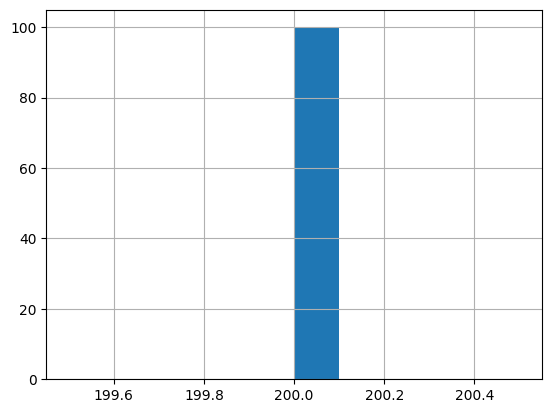

In [17]:
df['requeststatus'].hist()
pyl.show()

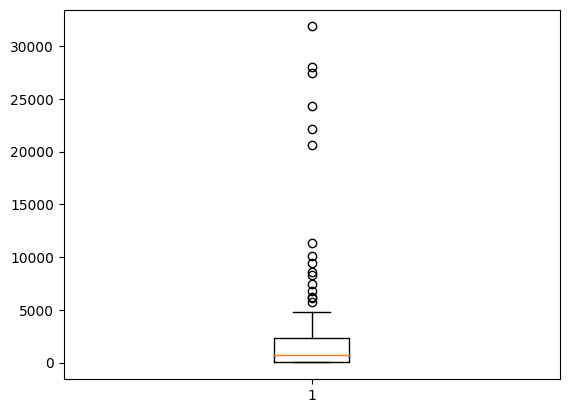

In [18]:
plt.boxplot(df['runTime'])
plt.show()

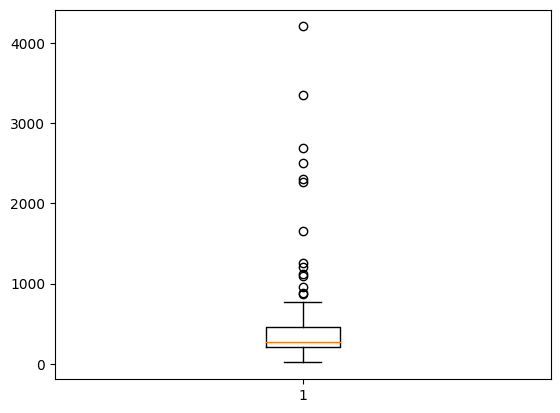

In [19]:
plt.boxplot(df['upvoteCount'])
plt.show()

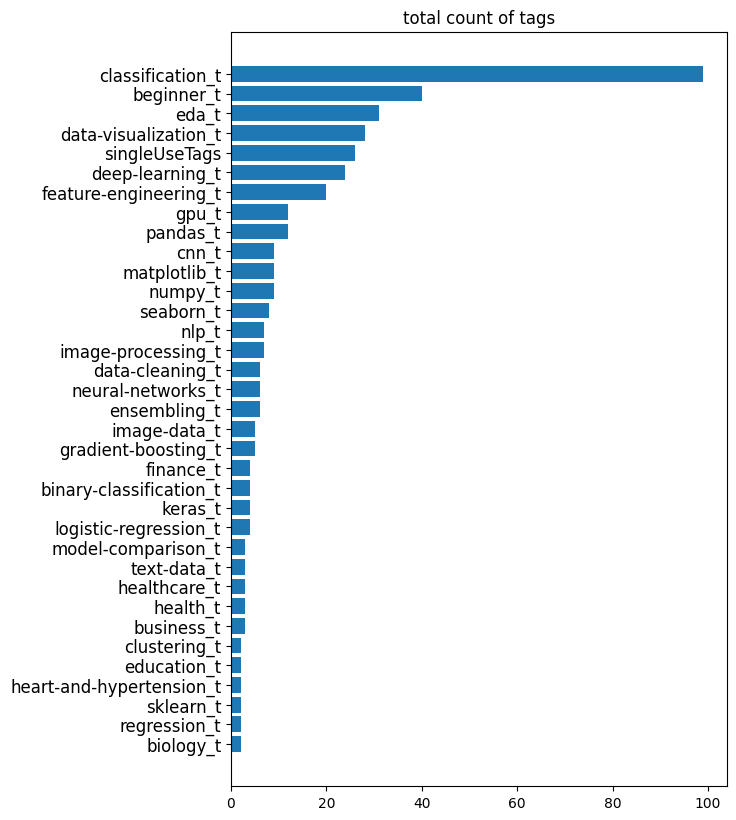

In [20]:
dftemp = pd.DataFrame([[0,"singleUseTags"]], columns=[
                  'height', 'bars'])
inLoop = False
index =1
singleUseTags=0
for column in df:
    #print(column)
    if(column=='imports'):
        inLoop=False
    if(inLoop):
        if(df[column].value_counts()[1]<2):
            singleUseTags+= df[column].value_counts()[1]
            dftemp.loc[0,"height"] =singleUseTags
        else:
            dftemp.loc[index,"bars"] = str(column)
            dftemp.loc[index, "height"] = df[column].value_counts()[1]
        index +=1
    if(column=='tags'):
        inLoop = True

dftemp = dftemp.sort_values(by=['height'])
f=plt.figure()
f.set_figheight(dftemp.index.max()/5)
plt.barh(y=dftemp.bars, width=dftemp.height)
plt.title('total count of tags')
plt.yticks(fontsize=12)

plt.show() 
#del dftemp # clear the memory

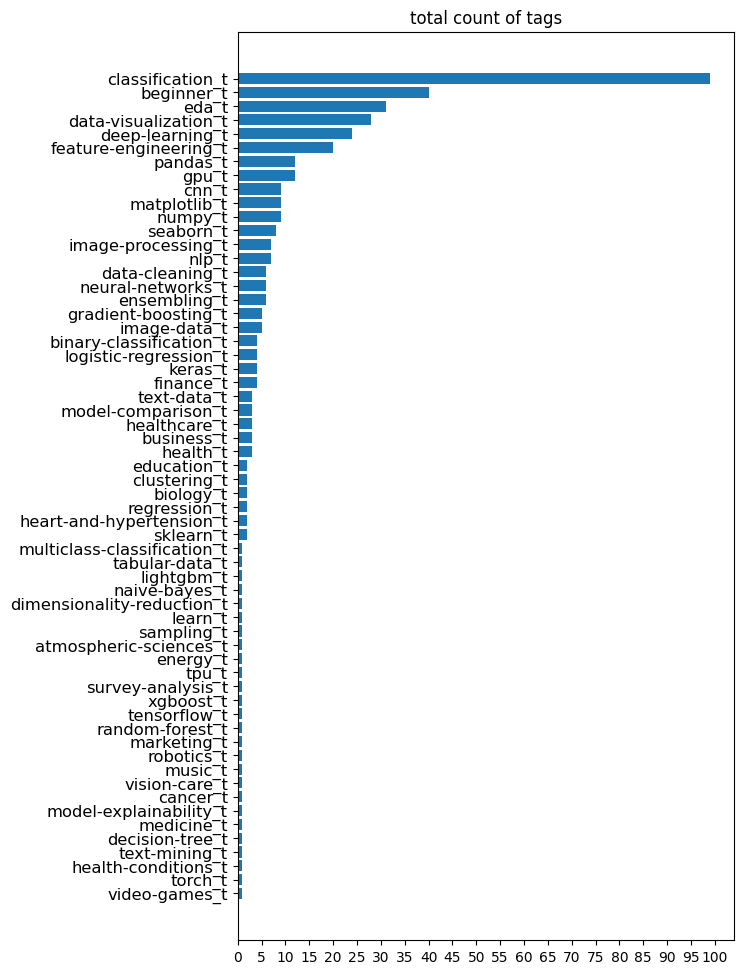

In [25]:
dftemp = pd.DataFrame([], columns=['height', 'bars'])
inLoop = False
index =0
singleUseTags=0
for column in df:
    #print(column)
    if(column=='imports'):
        inLoop=False
    if(inLoop):
        
        dftemp.loc[index,"bars"] = str(column)
        dftemp.loc[index, "height"] = df[column].value_counts()[1]
        index +=1
    if(column=='tags'):
        inLoop = True
inLoop=False

dftemp = dftemp.sort_values(by=['height'])
f=plt.figure()
scaleValue = dftemp.index.max()/5
f.set_figheight(scaleValue)
plt.barh(y=dftemp.bars, width=dftemp.height)
plt.title('total count of tags')
plt.yticks(fontsize=scaleValue)
plt.xticks(np.arange(0, max(dftemp.height)+5, 5))
plt.show() 

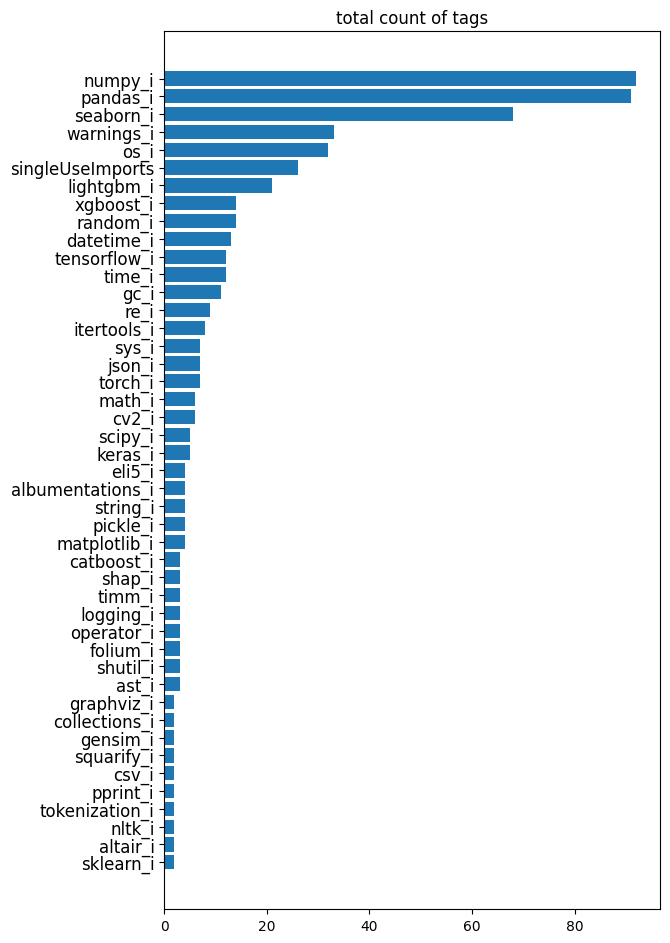

In [28]:
dftemp = pd.DataFrame([[0,"singleUseImports"]], columns=[
                  'height', 'bars'])
inLoop = False
index =1
singleUseImports=0
for column in df:
    #print(column)
    # if(column=='imports'):
    #     inLoop=False
    if(inLoop):
        if(df[column].value_counts()[1]<2):
            singleUseImports+= df[column].value_counts()[1]
            dftemp.loc[0,"height"] =singleUseTags
        else:
            dftemp.loc[index,"bars"] = str(column)
            dftemp.loc[index, "height"] = df[column].value_counts()[1]
        index +=1
    if(column=='imports'):
        inLoop = True

dftemp = dftemp.sort_values(by=['height'])
f=plt.figure()
f.set_figheight(dftemp.index.max()/5)
plt.barh(y=dftemp.bars, width=dftemp.height)
plt.title('total count of tags')
plt.yticks(fontsize=12)

plt.show() 
#del dftemp # clear the memory

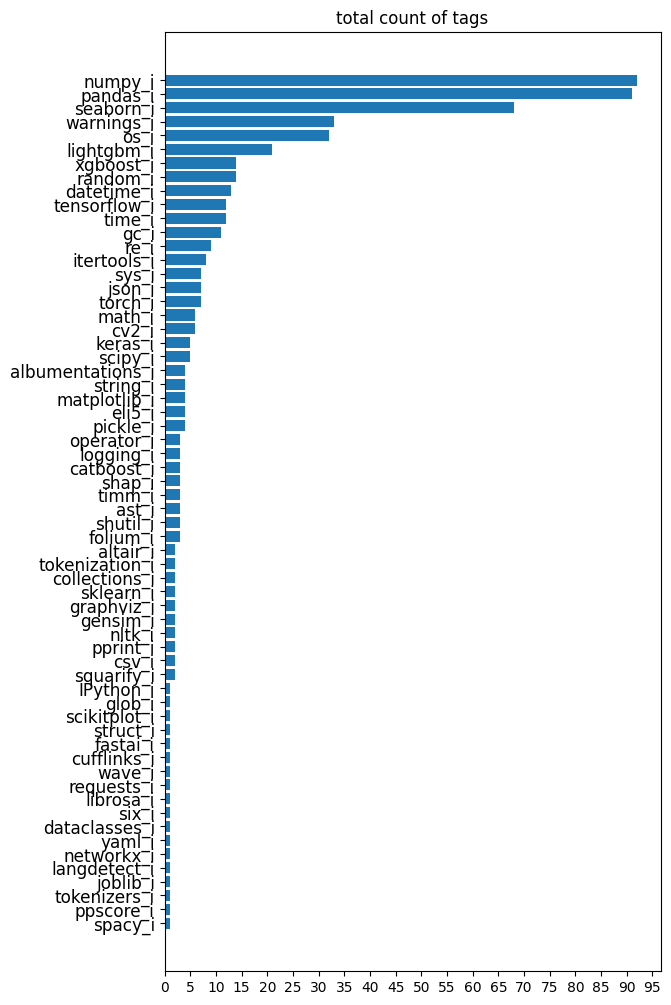

In [24]:
dftemp = pd.DataFrame([], columns=['height', 'bars'])
inLoop = False
index =0
singleUseTags=0
for column in df:
    #print(column)
    # if(column=='imports'):
    #     inLoop=False
    if(inLoop):
        
        dftemp.loc[index,"bars"] = str(column)
        dftemp.loc[index, "height"] = df[column].value_counts()[1]
        index +=1
    if(column=='imports'):
        inLoop = True
inLoop=False

dftemp = dftemp.sort_values(by=['height'])
f=plt.figure()
scaleValue = dftemp.index.max()/5
f.set_figheight(scaleValue)
plt.barh(y=dftemp.bars, width=dftemp.height)
plt.title('total count of tags')
plt.yticks(fontsize=scaleValue)
plt.xticks(np.arange(0, max(dftemp.height)+5, 5))
plt.show() 

#TODO
data scraping
- dataset size
- df info/describe
- imports -> "renderedOutputUrl":"https://www.kaggleusercontent.com/kf/16695845/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..LN2n7UXflQZHGdiPyIawQA.ZxFtQ5arZhUQgg9VYrSDwcLvdLfEDT1oFJ9v2C8XhtbrnUNw7tE-D3ChIOv8a4x9TDVeXVn3wSuwYAlMIgFO6XagoRvwyt5_q4HaJJLALCQD6w7M8AELO0h-8Itq_dyk3-qmWw33nwxWXmyNpqhMlnDLRm_9XrWhO6BlkPukax21RUma3mtqRu6ePOMnAC2PUS3G-TaCrVA4Js9TtQNBwV2Wtri0JtxmQ5ovQNpupmk8txPWrATzOho58-h75q9fyaR_SXkaefxoFBLGr2pVTynvQVJaVJkjWY3Sdgvf0D6wTVrL7NqAhUnb57pzHwU8b5SVP6C3UMv7qSUzvR4lWCDJQ-zvdBrXhB6q_zq6801ABtRn_qtLA_4yD1gSQEl1ap4o2fVgmlJYTrhkUGbxS9E8x46SO3maxmhXkDtnuDvraLlfzgDszuODClKyFXR0aQmudVlAq0FDlTy8NgNFwYdBj-rsXU_8b-hTiZ6XwuFMGiO0kmZqlZ-22ApX6C6BbupYkXaEcYZhxQCVsHL0IW7GPH_sVInLCsuaTZC0Testl3AOPLTarA--do5tdvFbvu2By4w6h8AyNNYHy4gZ54ucdDOV-zl1sppWlSsu0UJ9Kw6UxhwhV6o33qAmupxFrUnx-CTUEveVcr1npRVM2LBzy4_J0vYHgDdrDSoccdbGzWO6bHwhstv7FYr79TLrMm5MMGiRY4mA8uOBX9O9vQ.QESLhU52_G8BxvyD70ob_Q/__results__.html?sharingControls=true",
- tag count

write code in methods (remove a lot of loops)